<h1><font color="blue"><center>Sentiment Analysis Project-TrueFoundry</center></font></h1>
<h3><font color="green"><center>Narasimhan Kovalai</center></h3>
<h3><font color="green"><center>3rd Year (B.Tech in Computer Science and Engineering)</center></h3>
<h3><font color="green"><center>IIT Bhubaneswar</center></h3>
<center><img src=https://blog.truefoundry.com/content/images/size/w2000/2022/04/truefoundry.png width = 80%></center>

This jupyter notebook is an attempt to study an airline sentiment dataset and use it to train our model to predict future feedbacks as either positive or negative. Weighted Logistic regression was used to perform the task of binary classification.

In [1]:
#import all necessary modules
import helperss


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#importing necessary modules and packages

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, classification_report,f1_score 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import pickle 

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
class DataBlock():
    """Class representing the main csv data and its attributes"""
    
    def __init__(self,filename):
        """Declare and Initialise concerned attributes"""
        self.filename=filename
        self.SentimentList=[]
        self.PositiveSentimentList=[]
        self.NegativeSentimentList=[]
        self.FeedbackList=[]
        self.feedback_count=0
        self.labels=['Positive Sentiments','Negative Sentiments']
        self.information=[]
        
    def _readDataBlock(self):
        """Read the CSV file and convert into pandas dataframe"""
        df=pd.read_csv(self.filename)
        self.FeedbackList=df["text"].tolist()
        self.feedback_count=len(self.FeedbackList)
        self.SentimentList=df["airline_sentiment"].tolist()
        
        
    def _splitlist(self):
        """Segregate all the feedbacks into positive list ans negative list"""
        for index in range(self.feedback_count):
            if(self.SentimentList[index]=='positive'):
                self.PositiveSentimentList.append(self.FeedbackList[index])
            else:
                self.NegativeSentimentList.append(self.FeedbackList[index])
        
        self.information=[len(self.PositiveSentimentList),len(self.NegativeSentimentList)]
        
    def _visualise(self):
        """Pie chart to visualise the given data"""
        colors = ("green","red")
        plt.pie(self.information, labels = self.labels, colors = colors, autopct='%.0f%%')
        plt.title("Pie chart showing distribution of sentiments")
        plt.show()
        
      


* Create the frequency dictionary using the imported `build_freqs()` function.  
  

```Python
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
```
* Notice how the outer for loop goes through each tweet, and the inner for loop steps through each word in a tweet.
* The `freqs` dictionary is the frequency dictionary that's being built. 
* The key is the tuple (word, label), such as ("happy",1) or ("happy",0).  The value stored for each key is the count of how many times the word "happy" was associated with a positive label, or how many times "happy" was associated with a negative label.

### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". If you took the Deep Learning Specialization, we referred to the weights with the `w` vector.  In this course, we're using a different variable $\theta$ to refer to the weights.

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
z is also called as logits.

### Part 1.2 Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms.
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss.

#### Update the weights

To update your weight vector $\theta$, you will apply gradient descent to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.


We have implemented all of the above using scikit learn's Logistic Regression.

In [5]:
class NewModel(DataBlock):
    """A model which trains data and performs preprocessing """
    def __init__(self, filename):
        super().__init__(filename)
        self.freqs={}
        
    def _split_train_dataset(self):
        """Split dataset into train and test set using scikit learn"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.FeedbackList, self.SentimentList, test_size=0.2, random_state=42,stratify=self.SentimentList) 
        return [self.X_train, self.X_test, self.y_train, self.y_test]

    def _build_freqs(self):
        """Build frequency table : A mapping from (word ,sentiment) pair to its frequency"""
        self.freqs=helperss.build_freqs(self.X_train,self.y_train)
       
    def construct_matrix(self):
        """ collect the features 'x' and stack them into a matrix 'X' """
        self.X = np.zeros((len(self.X_train), 3))
        self.Y = np.zeros(len(self.y_train))
        for i in range(len(self.X_train)):
            
            self.X[i, :]= helperss.feature_extraction(self.X_train[i],self.freqs)
        

        for index in range(len(self.y_train)):
            if(self.y_train[index]=='positive'):
                self.Y[index]=1
            else:
                self.Y[index]=0

        # training labels corresponding to X
    
    def _train_model(self,w:dict):
        """Trains model using weighted logistic regression"""
        # A dictionary showing weights alloted to each label. This is user defined
        self.w=w
        #print(self.w)
        lg1 = LogisticRegression(class_weight=self.w)
        # fit it
        lg1.fit(self.X,self.Y)
        return lg1
    
    def _train_model_optimally(self):
        # define hyperparameters
        w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
            {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
            ]
        crange = np.arange(0.5, 20.0, 0.5)
        hyperparam_grid = {"class_weight": w
                        ,"penalty": ["l1", "l2"]
                        ,"C": crange
                        ,"fit_intercept": [True, False]  }
        
        lg4 = LogisticRegression(random_state=13)
        # define evaluation procedure
        grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
        grid.fit(self.X,self.Y)
        print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')



        
    

In [6]:
class prediction(NewModel):
    """A class which has methods for predicting sentiment for given testsets """
    def __init__(self, filename):
        super().__init__(filename)
        
    def _test_ON_testset(self,input_test:list,mode:int):
        """predicts sentiment when test set(prepared earlier via scikit-learn)"""
        self.input_test=input_test
        self.X_for_testing = np.zeros((len(self.input_test), 3))
        
        for i in range(len(self.input_test)):
            self.X_for_testing[i, :]= helperss.feature_extraction(self.input_test[i],self.freqs)
            
            
        self.y_test_num=[]
        self.y_pred=np.array(len(self.X_for_testing))
        self.lg1=self._train_model(self.w)
        self.y_pred = self.lg1.predict(self.X_for_testing)
        
        if(mode==0):
            return self.y_pred

        else:
            for j in range (len(self.y_test)):
                if (self.y_test[j]=='positive'):
                
                    self.y_test_num.append('1')
                else:
                    self.y_test_num.append('0')
            
            self.y_test_num = [eval(i) for i in self.y_test_num]
            self.y_test_num=np.array(self.y_test_num)
           
            # for eache in range(len(self.X_for_testing)):
            #     if(self.y_test_num[eache]!=self.y_pred[eache]):
            #         print(f"Actual-{self.y_test_num[eache]}:: {self.X_test[eache]}")
            
            print(f'Accuracy Score: {accuracy_score(self.y_test_num ,self.y_pred)}')
            
            print(f'Confusion Matrix: \n{confusion_matrix(self.y_test_num , self.y_pred)}')
            
            print(f'Area Under Curve: {roc_auc_score(self.y_test_num , self.y_pred)}')
            
            print(f'Recall score: {recall_score(self.y_test_num ,self.y_pred)}')
            print(f'Precision score: {precision_score(self.y_test_num ,self.y_pred)}')
            print(f'f1 score: {f1_score(self.y_test_num ,self.y_pred)}')
            
            logreg_conf_matrix_w = confusion_matrix(self.y_test_num, self.y_pred)
            plt.figure(figsize = (12,8))
            plt.title("Graphical representation of confusion matrix using seaborn")
            sns.set(font_scale=1.4) 
            ax = sns.heatmap(logreg_conf_matrix_w, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['Negative Feedback (0)', 'Positive Feedback (1)'], yticklabels=['Negative Feedback (0)', 'Positive Feedback (1)'])
            ax.set(xlabel='Predicted', ylabel='Actual')
            # ax.invert_yaxis()
            # ax.invert_xaxis()
        
    def _test_single_feedback(self,testcase):
        """Predicts sentiment for a single feedback- designed for generating REST APIs"""
        self.testcase=testcase
        return self._test_ON_testset(self.testcase,0)
        # self.testtext=np.zeros((1,3))
        # for i in range(1):
        #     self.testtext[i:]= helperss.feature_extraction(self.testcase[i],self.freqs)
        # (self.lg1.predict(self.testtext))

<h3><font color = "green"><center>Result using unweighted logistic regression</font></center>

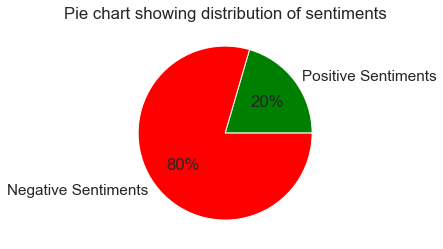

Result using unweighted logistic regression
Accuracy Score: 0.8549155478562148
Confusion Matrix: 
[[1778   58]
 [ 277  196]]
Area Under Curve: 0.6913929537048552
Recall score: 0.4143763213530655
Precision score: 0.7716535433070866
f1 score: 0.5392022008253095


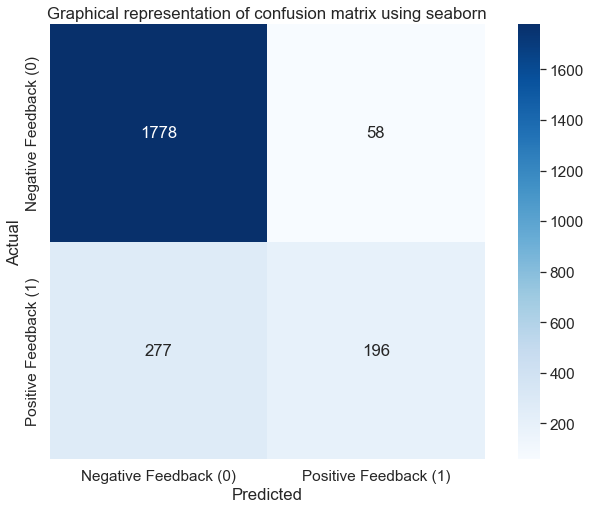

In [14]:
object=prediction('C:/Users/crick/Desktop/TrueFoundry/Folder/airline_sentiment_analysis.csv')
object._readDataBlock()
object._splitlist()
object._visualise()
return_vals=object._split_train_dataset()
object._build_freqs()
object.construct_matrix()
print("Result using unweighted logistic regression")
object._train_model({0:1,1:1})
object._test_ON_testset(return_vals[1],1)
object._test_single_feedback(['Flying at jet airways was a good experience. Congrats on 100th anniversary!'])


<h3><font color = "green"><center>Result using weighted logistic regression</font></center>

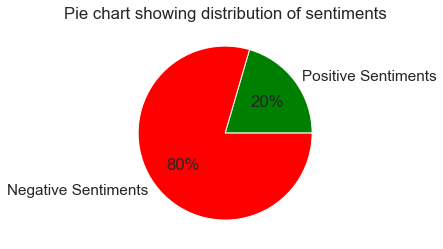

Result using weighted logistic regression
Accuracy Score: 0.8016457340840191
Confusion Matrix: 
[[1469  367]
 [  91  382]]
Area Under Curve: 0.8038599630596895
Recall score: 0.8076109936575053
Precision score: 0.5100133511348465
f1 score: 0.6252045826513911


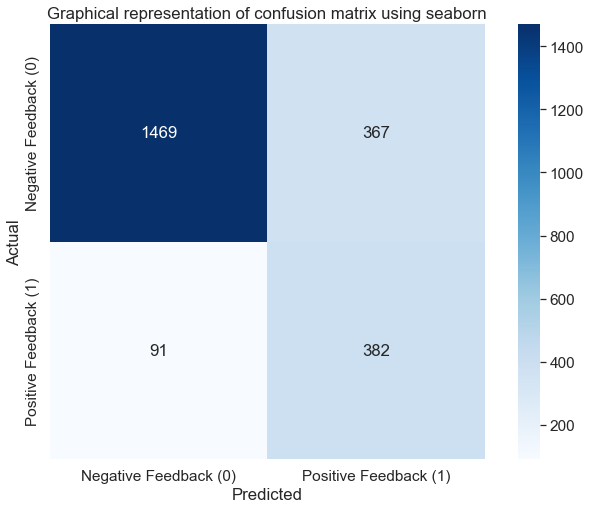

In [11]:

Instance=prediction('C:/Users/crick/Desktop/TrueFoundry/Folder/airline_sentiment_analysis.csv')
Instance._readDataBlock()
Instance._splitlist()
Instance._visualise()
return_val=Instance._split_train_dataset()
Instance._build_freqs()
Instance.construct_matrix()
Instance._train_model({0:11,1:55})
#Instance._train_model_optimally()
print("Result using weighted logistic regression")
Instance._test_ON_testset(return_val[1],1)
Instance._test_single_feedback(['Flying at jet airways was a good experience. Congrats on 100th anniversary!'])

        

In [13]:
#Converting the Instance object to a pickle file so that FastAPI can be made

pickle_out=open('sentiment_analysis_model.pkl','wb')
pickle.dump(Instance,pickle_out)
pickle_out.close()